In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re


%matplotlib inline

arquivo = pd.read_csv('results.csv')

texto = arquivo['text']

def filtro_de_palavras(text):
  return re.sub(r'(\W+|\d+|\b\w{0,3}\b)', ' ', text.lower())
texto = texto.apply(filtro_de_palavras)

arquivo.head()

,title,date,text,auhor,category,url
0,"De cada 4 venezuelanos, 1 precisa de ajuda hum...",04.04.19 21:00,Um documento de 45 páginas vazado da ONU calcu...,Ernesto,Mundo,https://www.oantagonista.com/mundo/de-cada-4-v...
1,"Publicação contra o Hamas é página virada, diz...",04.04.19 14:39,"De volta de Israel, onde fez parte da comitiva...",Heloisa,Mundo,https://www.oantagonista.com/mundo/publicacao-...
2,Maduro despacha do bunker,04.04.19 18:00,O ditador Nicolás Maduro não despacha do Palác...,Nina,Mundo,https://www.oantagonista.com/mundo/maduro-desp...
3,Ex-estrategista de Trump volta a atacar Mourão,04.04.19 18:40,"Steve Bannon, ex-estrategista de Donald Trump,...",Cino,Mundo,https://www.oantagonista.com/mundo/ex-estrateg...
4,Ditadura da Venezuela prende 47 por pedirem lu...,04.04.19 19:00,"Entre 29 de março e 1º de abril, 47 pessoas fo...",GILMAR,Mundo,https://www.oantagonista.com/mundo/ditadura-da...


In [87]:
formatando_texto = texto.str.cat(sep=' ')
palavras = pd.DataFrame([text for text in formatando_texto.split(' ') if len(text) > 0], columns=['palavra'])
palavras.describe()

,palavra
count,1751
unique,623
top,para
freq,37


In [0]:
frequencia = palavras['palavra'].value_counts()
tamanho_do_vocabulario =  len(palavras.palavra.unique())

In [89]:
tabela = {}
tabela['Total de documentos'] = len(arquivo)
tabela['Total de ocorrências de palavras'] = len(palavras)
tabela['Tamanho do Vocabulário'] = tamanho_do_vocabulario
tabela['Palavras que ocorrem> 1000 '] = len(frequencia[frequencia > 1000])
tabela['Palavras que ocorrem uma vez'] = len(frequencia[frequencia == 1])
tabela_estatistica = pd.DataFrame(tabela, index=[1])
tabela_estatistica

,Total de documentos,Total de ocorrências de palavras,Tamanho do Vocabulário,Palavras que ocorrem> 1000,Palavras que ocorrem uma vez
1,121,1751,623,0,256


In [90]:
rank = np.arange(0, tamanho_do_vocabulario) + 1 
frequencia_relativa = palavras['palavra'].value_counts(normalize = 'true')
print("Top-50 palavras mais frequentes em 100 noticias no site oantagonista")

frequencia_top_50 = {
    'Frequencia': frequencia,
    'Rank' : rank,
    'P(%)' : frequencia_relativa * 100,
    'P*Rank' : (frequencia_relativa * 100) * rank
}

frequencia_top_50 = pd.DataFrame(frequencia_top_50)
frequencia_top_50.head(50)

Top-50 palavras mais frequentes em 100 noticias no site oantagonista


,Frequencia,Rank,P(%),P*Rank
para,37,1,2.113078,2.113078
bolsonaro,29,2,1.656196,3.312393
jair,22,3,1.256425,3.769275
hoje,18,4,1.027984,4.111936
disse,15,5,0.856653,4.283267
justiça,15,6,0.856653,5.139920
mais,15,7,0.856653,5.996573
folha,14,8,0.799543,6.396345
contra,13,9,0.742433,6.681896
grupo,11,10,0.628212,6.282125


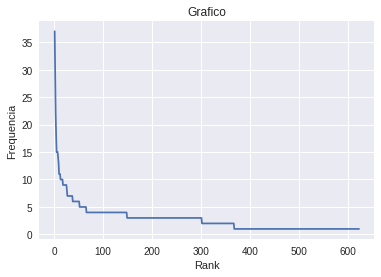

In [91]:
fig,ax = plt.subplots()

ax.plot(rank, frequencia)
plt.title('Grafico')

plt.xlabel('Rank')
plt.ylabel('Frequencia')
plt.show()

Escala logarítmica

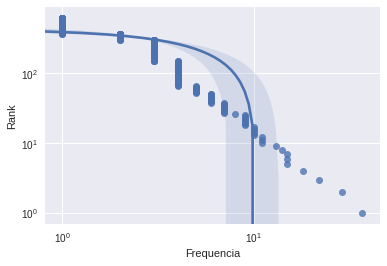

In [92]:
import seaborn as sns
f, ax = plt_pyp.subplots()
ax.set(xscale="log", yscale="log")

sns.regplot(x="Frequencia", y="Rank", data=frequencia_top_50)

In [102]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

bigramas = list(nltk.bigrams(list(palavras['palavra'].values)))


bigramas = pd.DataFrame({
    'Bigrama' : list(nltk.FreqDist(bigramas).keys()),
    'Frequencia' : list(nltk.FreqDist(bigramas).values()),
})

bigramas['Rank'] = bigramas['Frequencia'].rank(ascending=True, method='first')
bigramas = bigramas.sort_values(by='Frequencia')
bigramas.tail()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Bigrama,Frequencia,Rank
20,"(flávio, bolsonaro)",7,878.0
343,"(mesmo, porque)",7,879.0
34,"(nicolás, maduro)",9,880.0
228,"(joão, doria)",10,881.0
66,"(jair, bolsonaro)",19,882.0


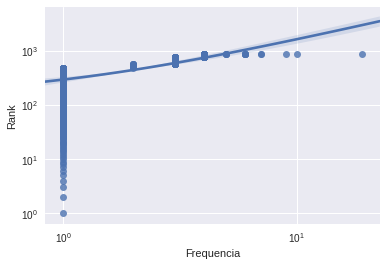

In [103]:
f, ax = plt_pyp.subplots()
ax.set(xscale="log", yscale="log")

sns.regplot(x="Frequencia", y="Rank", data=bigramas)